### (A)Pick a dataset, perform EDAand draw conclusionsand finally build a Logistic Regression model

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

%config Completer.use_jedi = False

In [2]:
# read csv file
df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')


In [3]:
# Know the data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Get more information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Statistical information
df.describe().round(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


In [6]:
# Check for missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# Age column and Cabin Column have a significant number of missing values

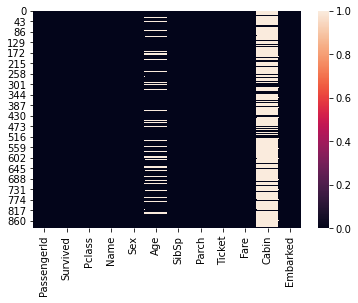

In [8]:
# Visualize missing values using a heatmap
sns.heatmap(df.isnull());

In [9]:
# Fill the NaN values in Age by age mean
df.Age.fillna(df.Age.mean(), inplace = True)
test_df.Age

0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413     NaN
414    39.0
415    38.5
416     NaN
417     NaN
Name: Age, Length: 418, dtype: float64

In [10]:
# Check the missing values in the Age column again
df.Age.isnull().sum()

0

In [11]:
# The missing values in the Age column have now been imputed with the Age mean

In [12]:
# Check for duplicate values
df.duplicated().any()

False

In [13]:
# There are no duplicate values


In [14]:
# Drop the unnecessary columns
df.drop(['PassengerId','Cabin','Name','Ticket'], axis=1,  inplace=True)

test_df_passenger_id = test_df.PassengerId
test_df.drop(['PassengerId','Cabin','Name','Ticket'], axis=1,  inplace=True)

In [15]:
# Convert the categorical data
# Convert Sex column
sex_dummies = pd.get_dummies(df.Sex, drop_first=True)
sex_dummies2 = pd.get_dummies(test_df.Sex, drop_first=True)
# convert Embarked column
emb_dummies = pd.get_dummies(df.Embarked)
emb_dummies2 = pd.get_dummies(test_df.Embarked)

In [16]:
# Join the  dummies to the dataframe
df = df.join([sex_dummies, emb_dummies])
test_df = test_df.join([sex_dummies, emb_dummies])

In [17]:
# Drop original column
df.drop(['Sex','Embarked'], axis=1, inplace=True)
test_df.drop(['Sex','Embarked'], axis=1, inplace=True)

In [18]:
# Rename new column
# 1='Male', 0='Female'
df.rename(columns={'male':'Gender','C':'Embarked_C','Q':'Embarked_Q','S':'Embarked_S'}, inplace=True)
test_df.rename(columns={'male':'Gender','C':'Embarked_C','Q':'Embarked_Q','S':'Embarked_S'}, inplace=True)

In [19]:
# The data is now cleaned
# All the columns are numerical

In [20]:
df.sample(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender,Embarked_C,Embarked_Q,Embarked_S
8,1,3,27.000000,0,2,11.1333,0,0,0,1
708,1,1,22.000000,0,0,151.5500,0,0,0,1
567,0,3,29.000000,0,4,21.0750,0,0,0,1
550,1,1,17.000000,0,2,110.8833,1,1,0,0
768,0,3,29.699118,1,0,24.1500,1,0,1,0


### Exploratory Data Analysis

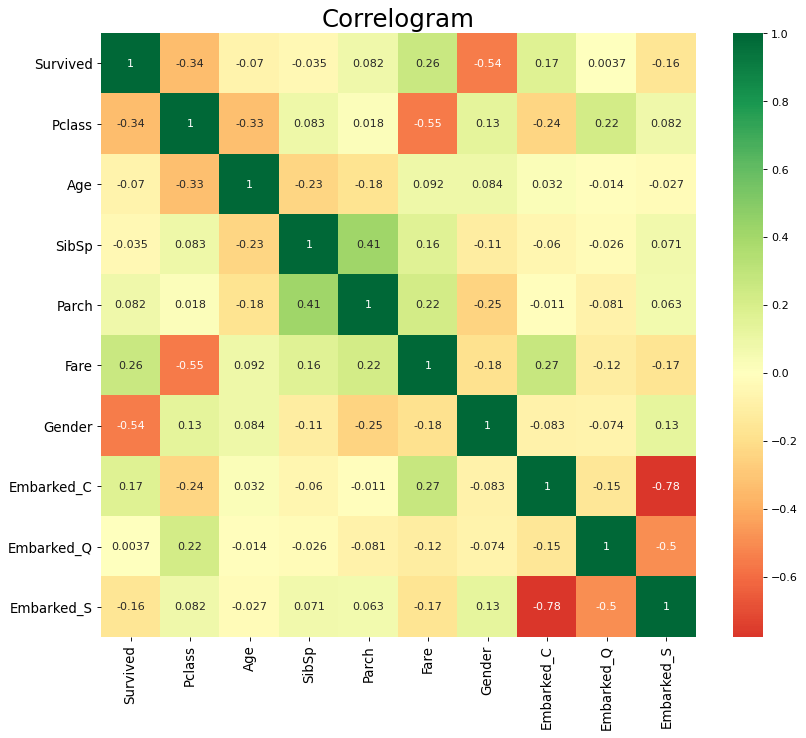

In [21]:
# Correlogram
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Correlogram', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [22]:
# Number of females and males in the data
df.Gender.value_counts()

1    577
0    314
Name: Gender, dtype: int64

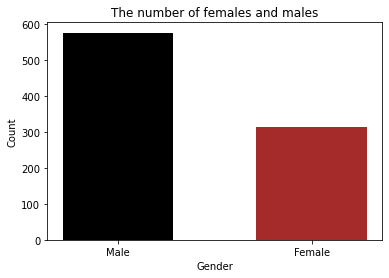

In [23]:
# Plot the number of males and females
width = 0.4
left = [width, width+0.7]
height = df.Gender.value_counts().unique()
tick_label = ['Male','Female']
plt.bar(left, height, tick_label = tick_label, width = 0.4, color = ['black', 'brown'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('The number of females and males')
plt.show()

In [24]:
# Find the average age
df.Age.mean()

29.699117647058763

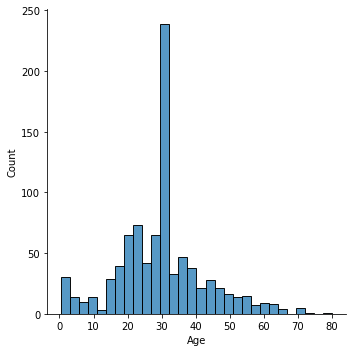

In [25]:
# Plot the age counts
sns.displot(df, x='Age');
# we can also use (df.Age.hist(bins = 40))

In [26]:
# Average male and female age
print('Average Female Age: ', df.groupby('Gender')['Age'].mean()[0])
print('Average Male Age: ', df.groupby('Gender')['Age'].mean()[1])

Average Female Age:  28.216730048707397
Average Male Age:  30.50582424304206


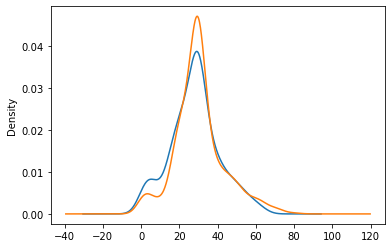

In [27]:
df.groupby('Gender').Age.plot(kind='kde');

In [28]:
# Count the number of survivors, and people who died
print('Number of survivors: ',df.Survived.value_counts()[1])
print('Number of dead: ',df.Survived.value_counts()[0])

Number of survivors:  342
Number of dead:  549


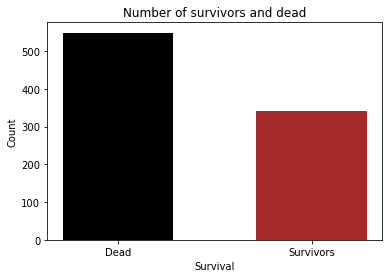

In [29]:
# Plot the number of people who survived and who died
width = 0.4
left = [width, width+0.7]
height = df.Survived.value_counts().unique()
survived_tick_label = ['Dead','Survivors']
plt.bar(left, height, tick_label = survived_tick_label, width = 0.4, color = ['black', 'brown'])
plt.xlabel('Survival')
plt.ylabel('Count')
plt.title('Number of survivors and dead')
plt.show()

<AxesSubplot:xlabel='Survived', ylabel='count'>

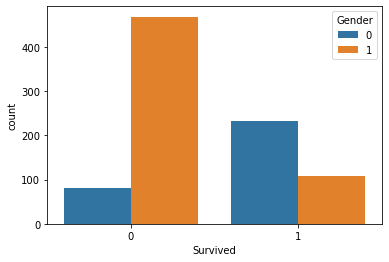

In [30]:
sns.countplot(data=df, x='Survived', hue='Gender')

In [31]:
# How many males and females survived and how many died?
df.query("Survived==1").groupby('Gender')['Survived'].count()


Gender
0    233
1    109
Name: Survived, dtype: int64

In [32]:
# 233 females survived and 109 males survived

In [33]:
df.query("Survived==0").groupby('Gender')['Survived'].count()

Gender
0     81
1    468
Name: Survived, dtype: int64

In [34]:
# 81 females died and 468 males died

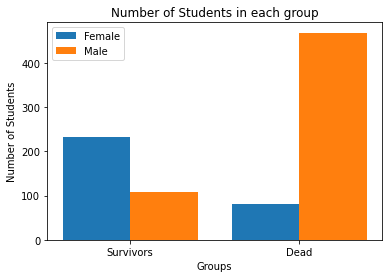

In [35]:
X = ['Survivors', 'Dead']
female_vals = [233,81]
male_vals = [109,468]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, female_vals, 0.4, label = 'Female')
plt.bar(X_axis + 0.2, male_vals, 0.4, label = 'Male')
  
plt.xticks(X_axis, X)
plt.xlabel("Groups")
plt.ylabel("Number of Students")
plt.title("Number of Students in each group")
plt.legend()
plt.show()

In [36]:
df.groupby('Survived').mean()

,Pclass,Age,SibSp,Parch,Fare,Gender,Embarked_C,Embarked_Q,Embarked_S
Survived,,,,,,,,,
0,2.531876,30.415100,0.553734,0.329690,22.117887,0.852459,0.136612,0.085610,0.777778
1,1.950292,28.549778,0.473684,0.464912,48.395408,0.318713,0.271930,0.087719,0.634503


### Logistic Regression Model

In [37]:
# Instantiate
# Target
y = df.Survived
# Feathers
x = df.drop('Survived', axis=1)

In [38]:
# Divide the  data into training and test data.
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=40)

In [39]:
# Use sklearn Logistic Regression to fit a logistic model
# logistic model
log_mod = LogisticRegression(max_iter=5000)
# Fit  the logistic model using train data
log_mod.fit(X_train, y_train)
# Predict y based on x
preds = log_mod.predict(X_test)

In [40]:
# Prediction
preds

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0], dtype=int64)

In [41]:
# Real values that we're trying to predict
y_test.values

array([0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0], dtype=int64)

### Define the following and evaluate your model by finding the following metrics: a.Confusion matrix, 
### b.Precision, 
### c.Recall, 
### d.F1-score,
### e.Sensitivity, 
### f.Specificity, 
### g.Misclassification rate,
### h.ROC, AUROC

#### a. Confusion Matrix: Confusion Matrix is a performance measurement for machine learning classification.Each row in a confusion matrix represents an actual class, while each column represents a predicted class.

In [62]:
c=confusion_matrix(y_test, preds)

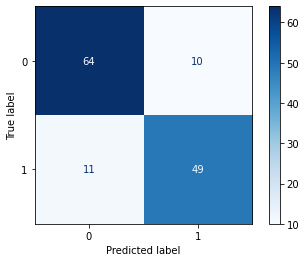

In [43]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(log_mod,X_test,y_test,cmap='Blues')
plt.grid(False)

In [44]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, preds))

Accuracy :  0.8432835820895522


In [59]:
accuracy = accuracy_score(y_test, preds)

#### c. Recall : The recall is calculated as the ratio between the numbers of Positive samples correctly classified as Positive to the total number of Positive samples.

In [45]:
from sklearn.metrics import recall_score
print('Recall: %.3f' % recall_score(y_test, preds))

Recall: 0.817


#### b. Precision:  Precision quantifies the number of positive class predictions that actually belong to the positive class.

In [48]:
from sklearn.metrics import precision_score
print('Precision: %.3f' % precision_score(y_test, preds))

Precision: 0.831


#### d. F1-score : F1 score is defined as the harmonic mean between precision and recall. It is used as a statistical measure to rate performance. In other words, an F1-score (from 0 to 9, 0 being lowest and 9 being the highest) is a mean of an individual's performance, based on two factors i.e. precision and recall.

In [49]:
from sklearn.metrics import f1_score
print('F1-Score: %3f' % f1_score(y_test, preds))

F1-Score: 0.823529


#### h. ROC: An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters: True Positive Rate. False Positive Rate

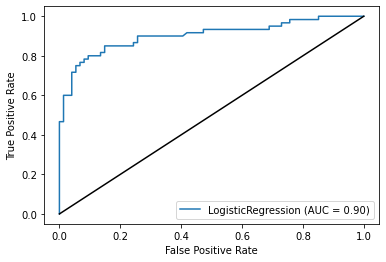

In [53]:
from sklearn.metrics import plot_roc_curve,roc_curve,plot_precision_recall_curve
plot_roc_curve(log_mod ,X_test,y_test)
plt.plot([0,1],[0,1],c="k")

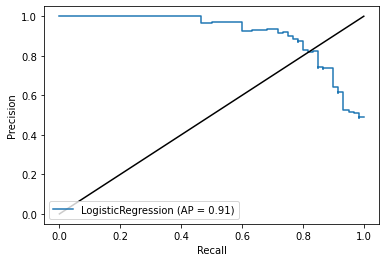

In [54]:
plot_precision_recall_curve(log_mod ,X_test,y_test)
plt.plot([0,1],[0,1],c="k")

In [55]:
log_mod.predict_proba(X_test)

array([[0.38770183, 0.61229817],
       [0.87326379, 0.12673621],
       [0.31893661, 0.68106339],
       [0.65257937, 0.34742063],
       [0.23199485, 0.76800515],
       [0.7627509 , 0.2372491 ],
       [0.84471909, 0.15528091],
       [0.85959728, 0.14040272],
       [0.7093163 , 0.2906837 ],
       [0.35033454, 0.64966546],
       [0.11024151, 0.88975849],
       [0.68207101, 0.31792899],
       [0.86362446, 0.13637554],
       [0.86586556, 0.13413444],
       [0.44506189, 0.55493811],
       [0.42259797, 0.57740203],
       [0.40899162, 0.59100838],
       [0.32378002, 0.67621998],
       [0.86426482, 0.13573518],
       [0.7870555 , 0.2129445 ],
       [0.43242997, 0.56757003],
       [0.13895907, 0.86104093],
       [0.17360143, 0.82639857],
       [0.32376489, 0.67623511],
       [0.08047705, 0.91952295],
       [0.30375539, 0.69624461],
       [0.87042922, 0.12957078],
       [0.90321124, 0.09678876],
       [0.6809071 , 0.3190929 ],
       [0.86360263, 0.13639737],
       [0.

In [56]:
log_mod.classes_

array([0, 1], dtype=int64)

#### g.Misclassification rate: In machine learning, misclassification rate is a metric that tells us the percentage of observations that were incorrectly predicted by some classification model

In [60]:
print ("Misclassification rate " ,1- accuracy)

Misclassification rate  0.15671641791044777


#### e. Senstivity: Sensitivity is a measure of how well a machine learning model can detect positive instances. It is also known as the true positive rate (TPR) or recall. Sensitivity is used to evaluate model performance because it allows us to see how many positive instances the model was able to correctly identify

In [64]:
sensitivity = c[1,1]/(c[1,0]+c[1,1])
print("Sensitivity  "  , sensitivity )

Sensitivity   0.8166666666666667


#### f. Specificity: Specificity itself can be described as the algorithm/model's ability to predict a true negative of each category available. In literature, it is also known simply as the true negative rate.

In [66]:
specificity = c[0,0]/(c[0,0]+c[0,1])
print('Specificity  ', specificity)

Specificity   0.8648648648648649


#### h. AUROC: AUROC is a performance metric for “discrimination”: it tells one about the model's ability to discriminate between cases (positive examples) and non-cases (negative examples.)

In [67]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, preds)

0.8407657657657659